In [1]:
import pandas as pd

In [2]:
import dill

In [3]:
import numpy

In [4]:
%matplotlib inline

In [69]:
df = pd.read_csv("orders.csv", parse_dates=["created_at_date"])

In [6]:
df.head()

,customer_id,order_id,order_item_id,num_items,revenue,created_at_date
0,37d67f5feef4cb754056a54841e43ad9,4662083,21257304.0,1.0,24.79,2017-09-01
1,d0d7a76fea3729a9381d39aca78b52d3,4655291,21224156.0,1.0,22.68,2017-09-01
2,450e1c2cbd21687780153995f1be0c23,4661361,21253627.0,1.0,10.07,2017-09-01
3,1b9131d69fb9745f0c22e22c6d55437f,4656415,21229235.0,1.0,7.37,2017-09-01
4,03c9fd0e00e2cef5d72d0af8e869aabe,4658541,21239714.0,1.0,16.66,2017-09-01


In [8]:
df.keys()

Index(['customer_id', 'order_id', 'order_item_id', 'num_items', 'revenue',
       'created_at_date'],
      dtype='object')

In [9]:
max_revenue = df[['customer_id', 'revenue']].groupby('customer_id', as_index=True).max()['revenue']

In [26]:
df[['customer_id', 'order_id']].groupby(['customer_id']).order_id.nunique().to_frame()

,order_id
customer_id,
000011265b8a3727c4cc77b494134aca,1
000079318ce4bdc1897a9c711e107b55,1
0000e349e3d5eb96a2dc1939beebf9e4,1
0001159afe8b9309aeb95fa17886d688,1
000146a1e6decca6773a52afd2ed0255,2
0001aa41356a707949e8a715947ff85c,1
0001b3166c1bcb11f331e6676f7863a9,1
0001cf68347245f00fe71fd9d677e9df,1
00022da3f8257cbda32247d4e02c4b6d,1


In [11]:
max_items = df[['customer_id', 'num_items']].groupby('customer_id', as_index=True).max()['num_items']

In [12]:
total_revenue = df[['customer_id', 'revenue']].groupby('customer_id', as_index=True).sum()['revenue']

In [13]:
days_since_last_order = pd.Timestamp.strptime('2017-10-17', '%Y-%m-%d') - df[['customer_id', 'created_at_date']].groupby('customer_id', as_index=True).max()['created_at_date']

In [15]:
result = pd.DataFrame({'Max revenue': max_revenue, 'Order count': order_count, 'Max items': max_items, 'Total revenue': total_revenue, 'Days since last order': days_since_last_order})

In [16]:
model = dill.load(open("model.dill", 'rb'))

In [17]:
array = numpy.array([[2, 5, 6, 7, 9, 10], [3, 6, 7, 8, 11, 12]])

In [18]:
model.predict(array)

array([39, 47])

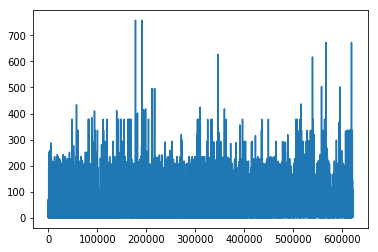

In [19]:
df['revenue'].plot()

In [20]:
result

,Days since last order,Max items,Max revenue,Order count,Total revenue
customer_id,,,,,
000011265b8a3727c4cc77b494134aca,18 days,1.0,42.010000,1,42.010000
000079318ce4bdc1897a9c711e107b55,2 days,1.0,21.000000,3,54.600000
0000e349e3d5eb96a2dc1939beebf9e4,4 days,1.0,20.820000,1,20.820000
0001159afe8b9309aeb95fa17886d688,26 days,1.0,14.280000,1,14.280000
000146a1e6decca6773a52afd2ed0255,20 days,1.0,22.680000,3,68.040000
0001aa41356a707949e8a715947ff85c,39 days,1.0,16.660000,2,33.320000
0001b3166c1bcb11f331e6676f7863a9,11 days,1.0,14.280000,3,37.790000
0001cf68347245f00fe71fd9d677e9df,6 days,1.0,20.480000,1,20.480000
00022da3f8257cbda32247d4e02c4b6d,18 days,1.0,25.200000,2,46.200000


In [38]:
customers_orders = df.groupby(['customer_id', 'order_id'])

In [37]:
def max_items():
    return df.groupby(['customer_id', 'order_id'])['customer_id', 'order_id', 'num_items'].sum().groupby(['customer_id']).max()

In [29]:
df.head()

,customer_id,order_id,order_item_id,num_items,revenue,created_at_date
0,37d67f5feef4cb754056a54841e43ad9,4662083,21257304.0,1.0,24.79,2017-09-01
1,d0d7a76fea3729a9381d39aca78b52d3,4655291,21224156.0,1.0,22.68,2017-09-01
2,450e1c2cbd21687780153995f1be0c23,4661361,21253627.0,1.0,10.07,2017-09-01
3,1b9131d69fb9745f0c22e22c6d55437f,4656415,21229235.0,1.0,7.37,2017-09-01
4,03c9fd0e00e2cef5d72d0af8e869aabe,4658541,21239714.0,1.0,16.66,2017-09-01


In [71]:
lol = df[['customer_id', 'created_at_date']].groupby('customer_id').max()['created_at_date'].subtract(pd.Timestamp(datetime(2017, 10, 17))).abs().to_frame()

In [72]:
lol.dtypes

created_at_date    timedelta64[ns]
dtype: object